# Tennessee Eastman Process

## 1. Introduction et contexte
Objectif : 
Détection de perturbations sans classification des pannes.

## 2. Importation des bibliothèques et des données

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
# Chemin relatif vers le fichier
file = '../raw_data/TEP_FaultFree_Training.csv'

# Lecture du fichier CSV
# data = pd.read_csv(file, decimal=',') A NE PAS FAIRE !!!!
data = pd.read_csv(file)

## 3. Exploration initiale des données

### 3.1 Afficher les premières lignes des données

In [26]:
data

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0,500,496,0.29325,3640.1,4473.0,9.1949,26.867,42.379,2700.2,...,53.429,29.249,60.773,21.532,40.451,34.064,48.953,48.291,40.812,18.756
249996,0,500,497,0.29134,3625.7,4506.2,9.2109,26.889,42.291,2700.6,...,53.830,28.975,61.517,21.750,42.762,42.645,51.055,48.589,40.933,19.360
249997,0,500,498,0.29438,3600.2,4478.3,9.1957,26.820,42.448,2700.3,...,54.163,28.676,61.656,21.487,42.109,39.770,46.770,48.648,41.465,19.344
249998,0,500,499,0.25269,3683.5,4486.4,9.2832,27.188,42.757,2697.4,...,53.453,24.889,61.564,21.392,39.334,42.274,43.623,48.797,39.835,18.512


### 3.2 Afficher les informations générales sur les données

In [27]:
# Afficher un résumé des données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   faultNumber    250000 non-null  int64  
 1   simulationRun  250000 non-null  int64  
 2   sample         250000 non-null  int64  
 3   xmeas_1        250000 non-null  float64
 4   xmeas_2        250000 non-null  float64
 5   xmeas_3        250000 non-null  float64
 6   xmeas_4        250000 non-null  float64
 7   xmeas_5        250000 non-null  float64
 8   xmeas_6        250000 non-null  float64
 9   xmeas_7        250000 non-null  float64
 10  xmeas_8        250000 non-null  float64
 11  xmeas_9        250000 non-null  float64
 12  xmeas_10       250000 non-null  float64
 13  xmeas_11       250000 non-null  float64
 14  xmeas_12       250000 non-null  float64
 15  xmeas_13       250000 non-null  float64
 16  xmeas_14       250000 non-null  float64
 17  xmeas_15       250000 non-nul

In [21]:
print(data[['xmeas_1', 'xmeas_2', 'xmv_1']].head())

   xmeas_1 xmeas_2   xmv_1
0  0.25038    3674  62.881
1  0.25109  3659.4  63.132
2  0.25038  3660.3  63.117
3  0.24977  3661.3    63.1
4  0.29405    3679  63.313


### 3.3 Forcer le dtype des colonnes

In [22]:
# Convertir toutes les colonnes xmeas et xmv en float32 pour économiser la mémoire
cols_to_convert = [col for col in data.columns if col.startswith(('xmeas', 'xmv'))]
data[cols_to_convert] = data[cols_to_convert].astype('float32')

In [23]:
# Convertir toutes les colonnes faultNumber, simulationRun et sample en int16 pour économiser la mémoire
cols_to_convert = [col for col in data.columns if col.startswith(('fault', 'simul', 'samp'))]
data[cols_to_convert] = data[cols_to_convert].astype('int16')

### 3.4 Statistiques descriptives

In [24]:
print(data.describe())

       faultNumber  simulationRun         sample        xmeas_1  \
count     250000.0  250000.000000  250000.000000  250000.000000   
mean           0.0     250.500000     250.500000       0.250482   
std            0.0     144.337567     144.337567       0.030873   
min            0.0       1.000000       1.000000       0.122450   
25%            0.0     125.750000     125.750000       0.229770   
50%            0.0     250.500000     250.500000       0.250510   
75%            0.0     375.250000     375.250000       0.271200   
max            0.0     500.000000     500.000000       0.391740   

             xmeas_2        xmeas_3        xmeas_4        xmeas_5  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean     3663.785645    4508.819336       9.347100      26.902203   
std        34.006359      39.215420       0.085721       0.211485   
min      3511.800049    4336.899902       8.972700      25.951000   
25%      3640.800049    4482.399902       9.289300 

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   faultNumber    250000 non-null  int16  
 1   simulationRun  250000 non-null  int16  
 2   sample         250000 non-null  int16  
 3   xmeas_1        250000 non-null  float32
 4   xmeas_2        250000 non-null  float32
 5   xmeas_3        250000 non-null  float32
 6   xmeas_4        250000 non-null  float32
 7   xmeas_5        250000 non-null  float32
 8   xmeas_6        250000 non-null  float32
 9   xmeas_7        250000 non-null  float32
 10  xmeas_8        250000 non-null  float32
 11  xmeas_9        250000 non-null  float32
 12  xmeas_10       250000 non-null  float32
 13  xmeas_11       250000 non-null  float32
 14  xmeas_12       250000 non-null  float32
 15  xmeas_13       250000 non-null  float32
 16  xmeas_14       250000 non-null  float32
 17  xmeas_15       250000 non-nul

## 4 Vérifier les valeurs manquantes

In [10]:
# Nombre de valeurs manquantes par colonne
print(data.isnull().sum())

faultNumber      0
simulationRun    0
sample           0
xmeas_1          0
xmeas_2          0
xmeas_3          0
xmeas_4          0
xmeas_5          0
xmeas_6          0
xmeas_7          0
xmeas_8          0
xmeas_9          0
xmeas_10         0
xmeas_11         0
xmeas_12         0
xmeas_13         0
xmeas_14         0
xmeas_15         0
xmeas_16         0
xmeas_17         0
xmeas_18         0
xmeas_19         0
xmeas_20         0
xmeas_21         0
xmeas_22         0
xmeas_23         0
xmeas_24         0
xmeas_25         0
xmeas_26         0
xmeas_27         0
xmeas_28         0
xmeas_29         0
xmeas_30         0
xmeas_31         0
xmeas_32         0
xmeas_33         0
xmeas_34         0
xmeas_35         0
xmeas_36         0
xmeas_37         0
xmeas_38         0
xmeas_39         0
xmeas_40         0
xmeas_41         0
xmv_1            0
xmv_2            0
xmv_3            0
xmv_4            0
xmv_5            0
xmv_6            0
xmv_7            0
xmv_8            0
xmv_9       

## 5 Visualiser les séries temporelles des variables clés

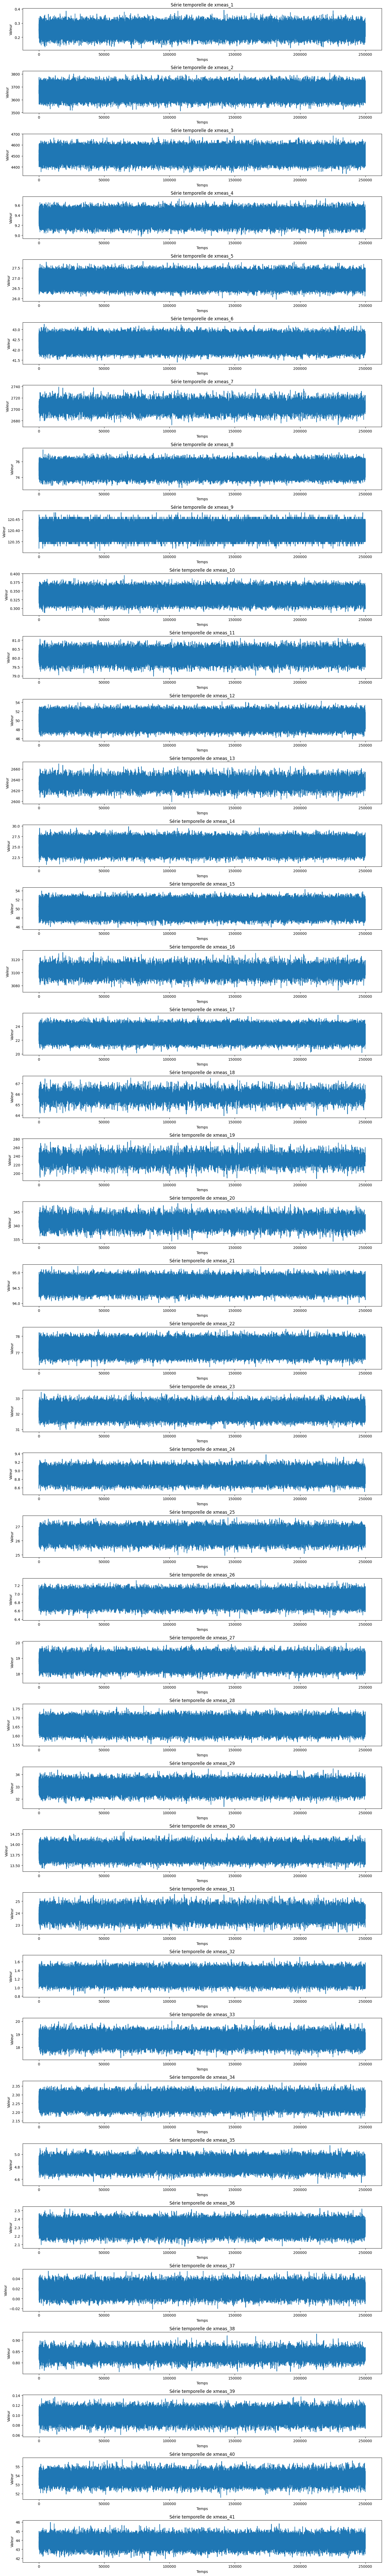

In [11]:
# Tracer les variables mesurées xmeas
plt.figure(figsize=(15, 100))
for i in range(1, 42):
    plt.subplot(41, 1, i)
    plt.plot(data[f'xmeas_{i}'])
    plt.title(f'Série temporelle de xmeas_{i}')
    plt.xlabel('Temps')
    plt.ylabel('Valeur')
plt.tight_layout()
plt.show()

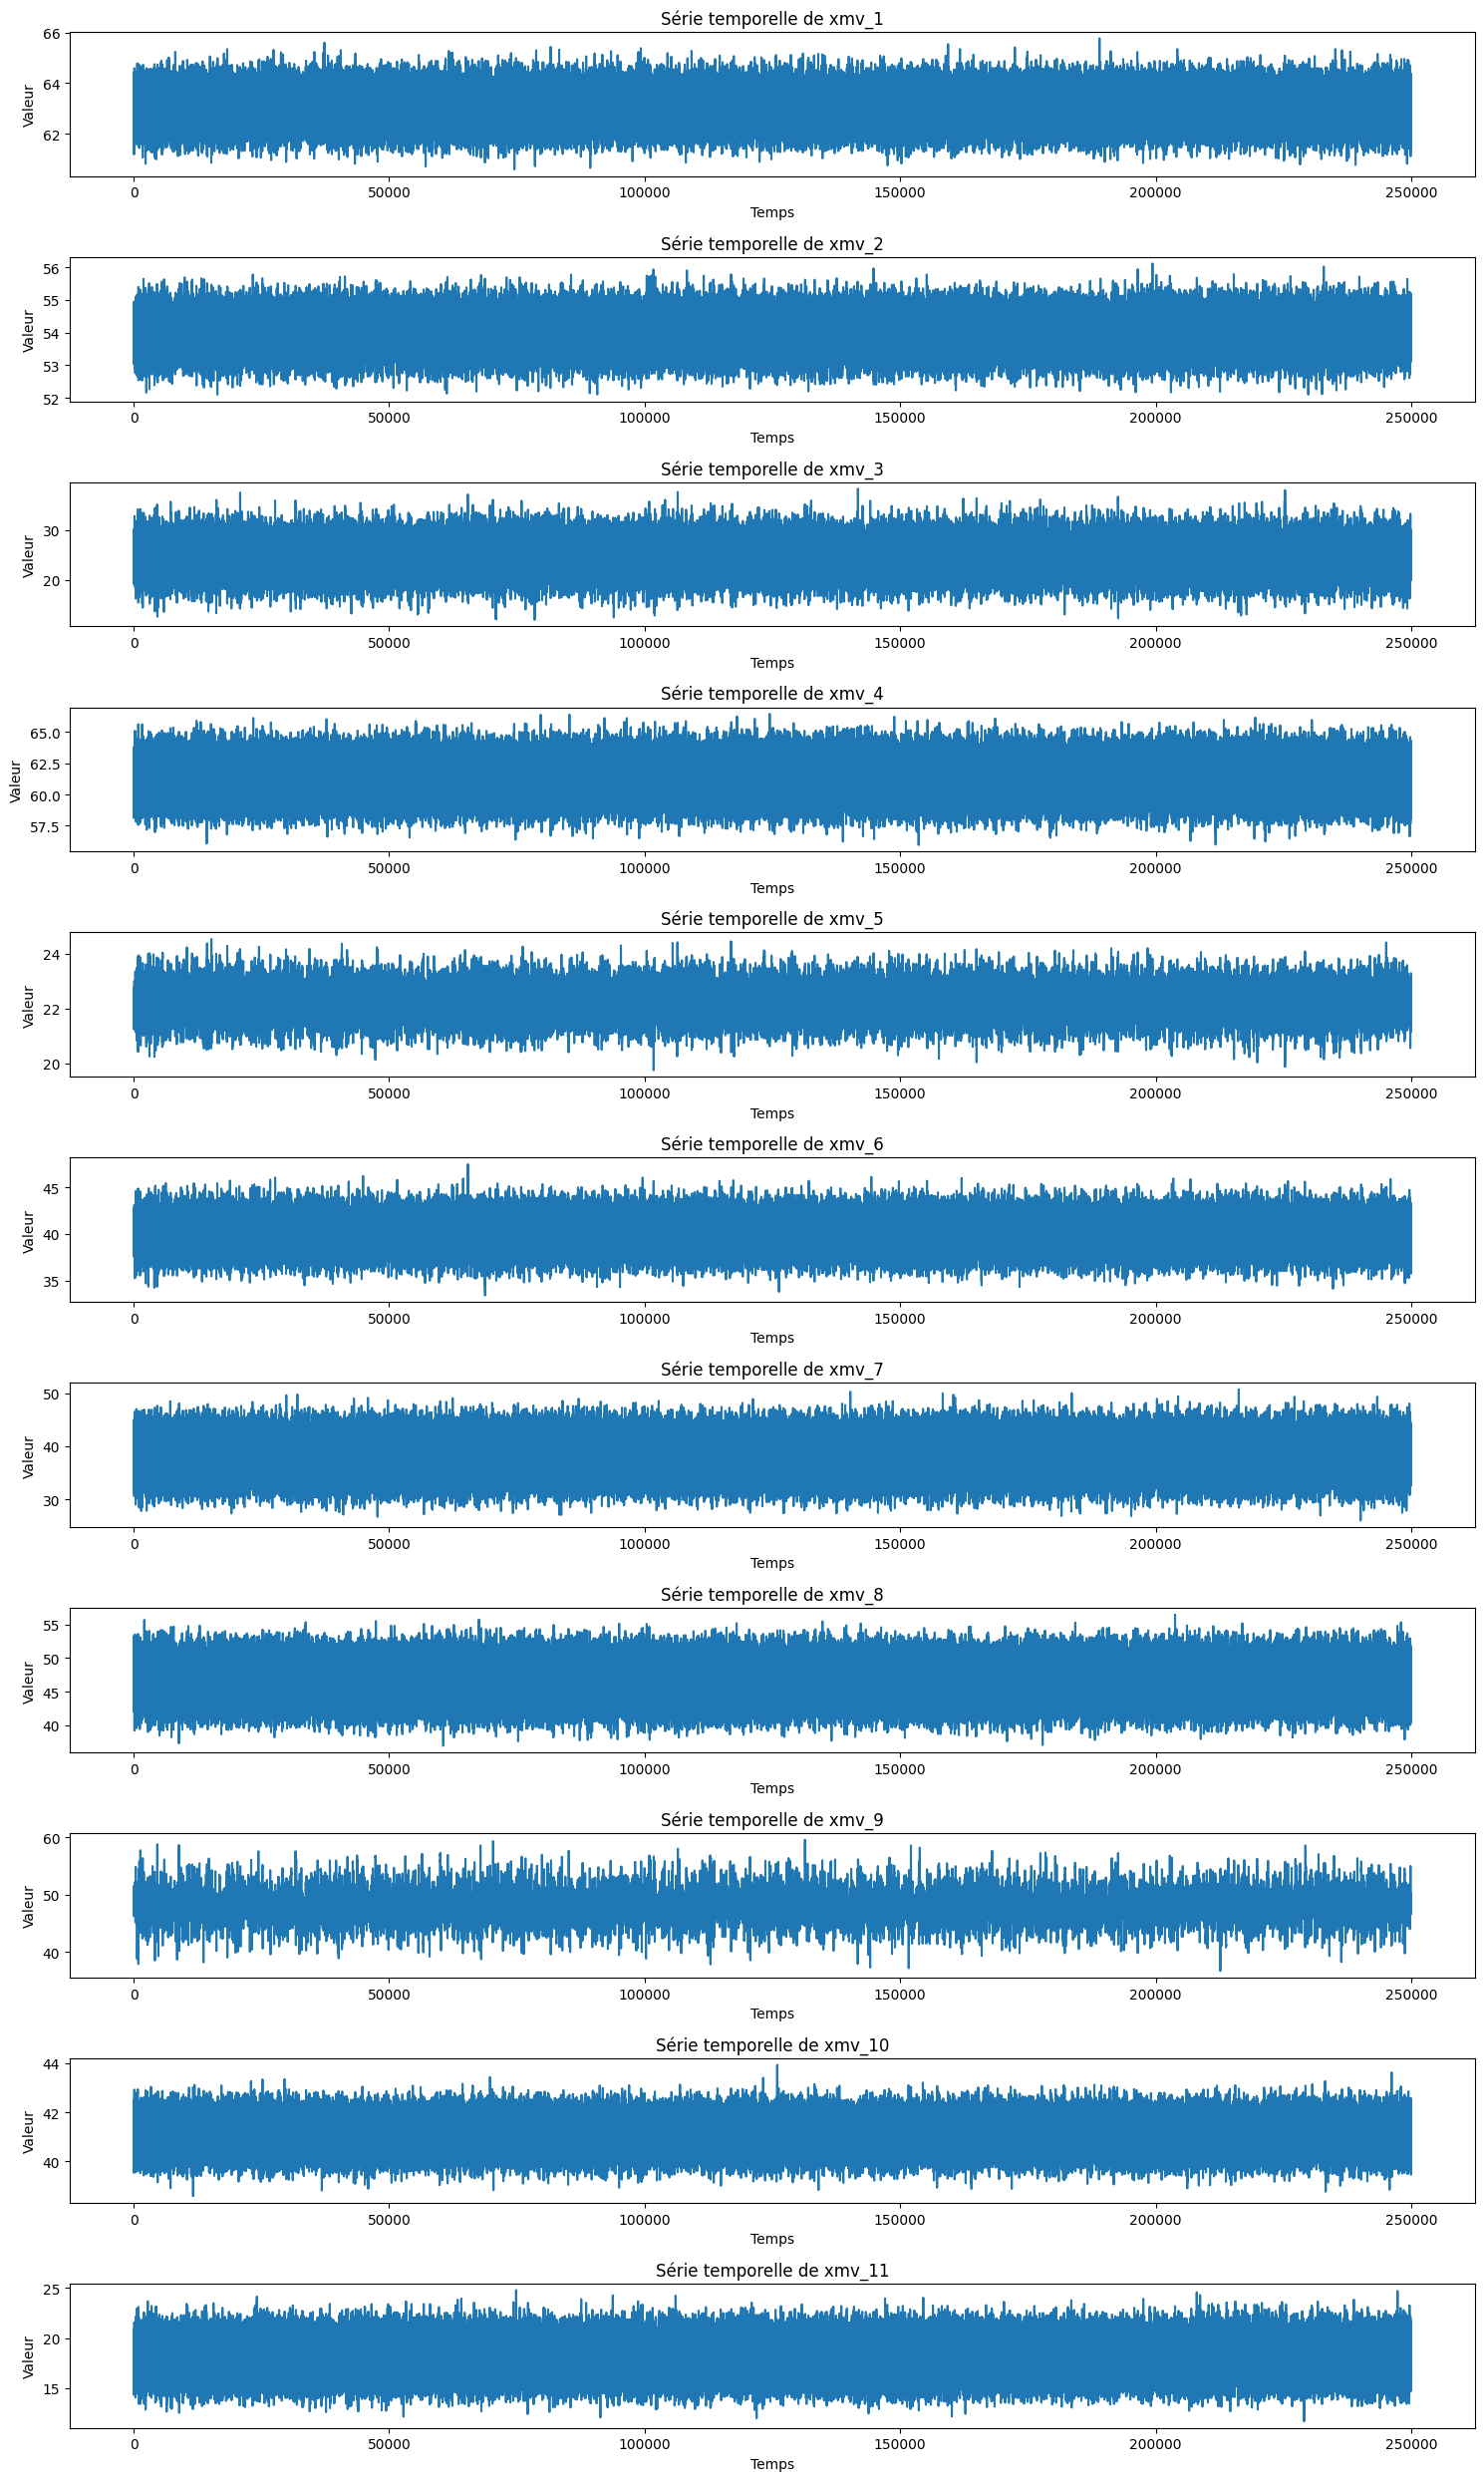

In [12]:
# Tracer les variables mesurées xmv
plt.figure(figsize=(15, 25))
for i in range(1, 12):
    plt.subplot(11, 1, i)
    plt.plot(data[f'xmv_{i}'])
    plt.title(f'Série temporelle de xmv_{i}')
    plt.xlabel('Temps')
    plt.ylabel('Valeur')
plt.tight_layout()
plt.show()

## 6 Visualiser la distribution des variables

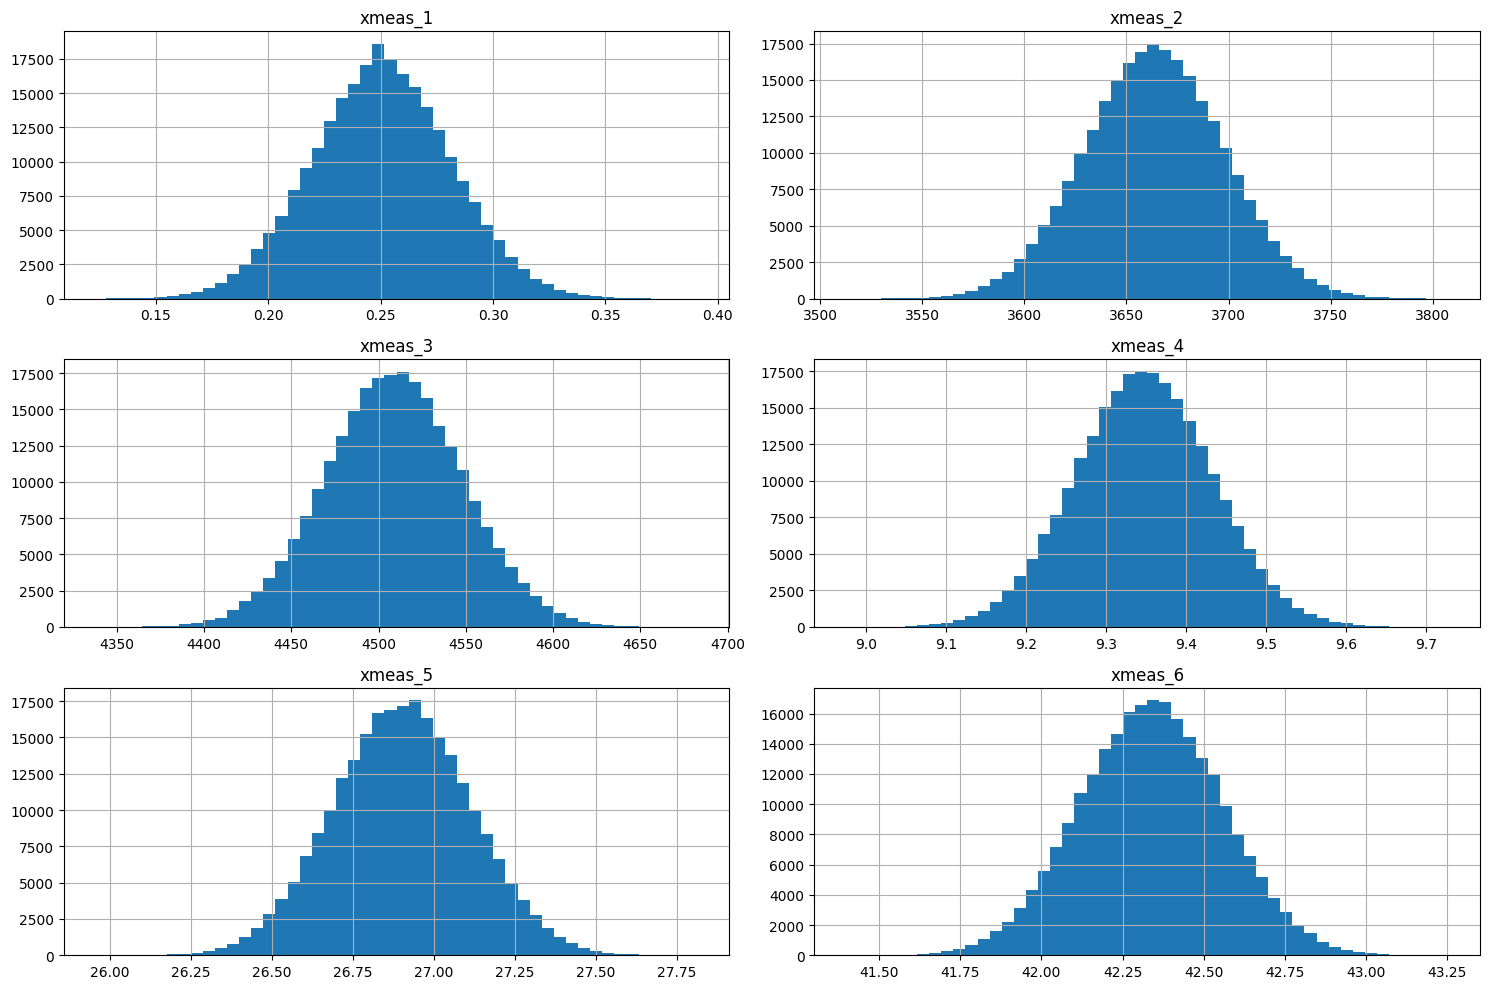

In [13]:
# Histogrammes des 6 premières variables
data[['xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6']].hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

## 7 Matrice de corrélation

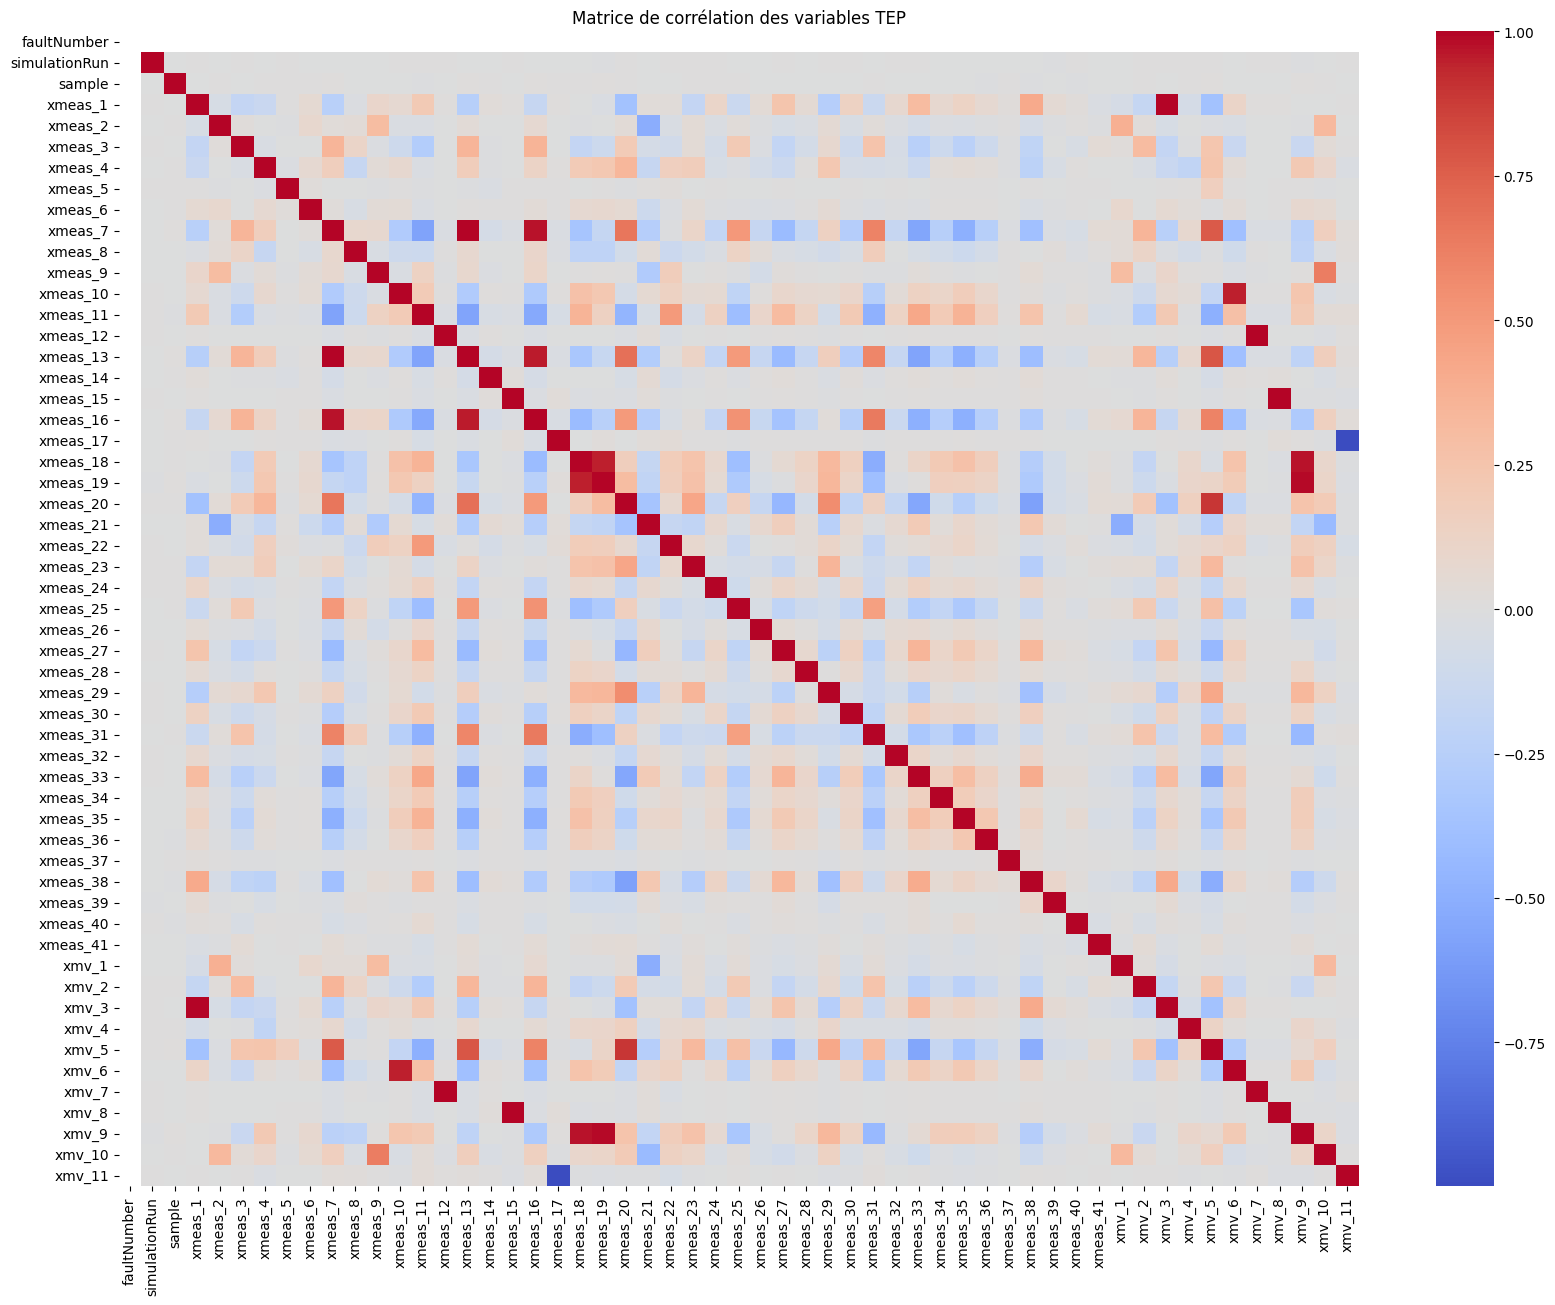

In [14]:
# Calculer la matrice de corrélation
corr_matrix = data.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation des variables TEP')
plt.show()

## 8 Analyse des corrélations fortes

In [15]:
# Extraire les paires de variables avec une corrélation > 0.8 ou < -0.8
strong_corr = corr_matrix[(corr_matrix > 0.8) | (corr_matrix < -0.8)]
strong_corr = strong_corr.where(np.triu(np.ones(strong_corr.shape), k=1).astype(bool))
print(strong_corr.stack().reset_index())

     level_0   level_1         0
0    xmeas_1     xmv_3  0.996587
1    xmeas_7  xmeas_13  0.997386
2    xmeas_7  xmeas_16  0.969467
3   xmeas_10     xmv_6  0.948284
4   xmeas_12     xmv_7  1.000000
5   xmeas_13  xmeas_16  0.959764
6   xmeas_15     xmv_8  1.000000
7   xmeas_17    xmv_11 -0.999243
8   xmeas_18  xmeas_19  0.949616
9   xmeas_18     xmv_9  0.970133
10  xmeas_19     xmv_9  0.986063
11  xmeas_20     xmv_5  0.894183


## 9 Détection visuelle des anomalies

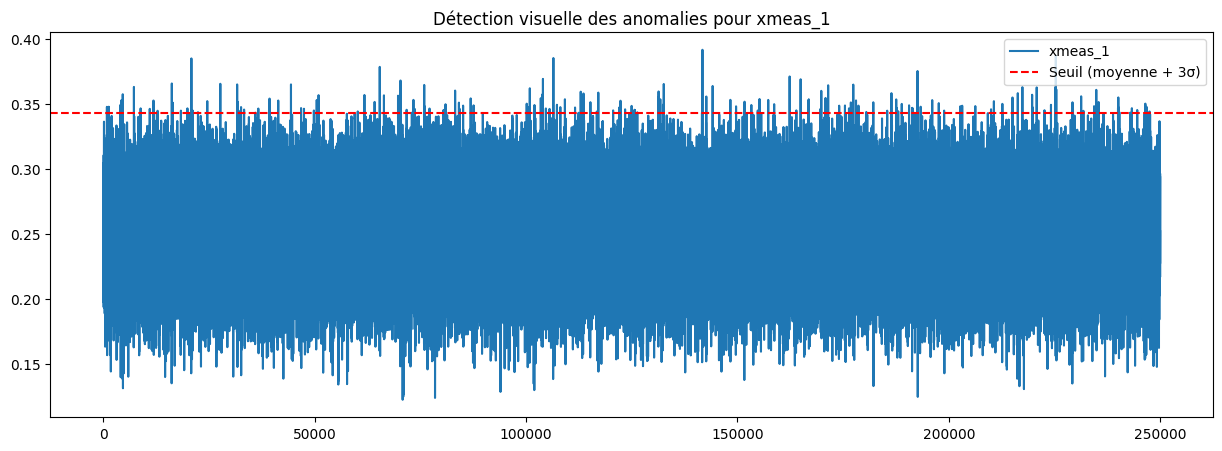

In [16]:
# Exemple : Tracer une variable avec un seuil arbitraire pour repérer les pics
variable = 'xmeas_1'
plt.figure(figsize=(15, 5))
plt.plot(data[variable], label=variable)
plt.axhline(y=data[variable].mean() + 3*data[variable].std(), color='r', linestyle='--', label='Seuil (moyenne + 3σ)')
plt.legend()
plt.title(f'Détection visuelle des anomalies pour {variable}')
plt.show()